In [11]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss('data/PLdata_bh_34.mat')
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss('data/PLdata_bh_53.mat')
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss('data/PLdata_bh_64.mat')

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss('data/PLdata_ma_34.mat')
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss('data/PLdata_ma_53.mat')
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss('data/PLdata_ma_64.mat')

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)

<Bundang>


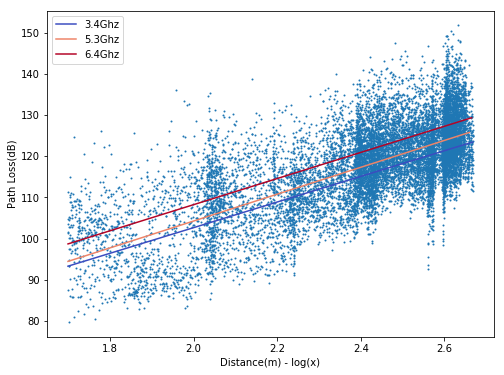

RMSE(dB),train error,test error
3.4Ghz,7.05391,7.08650
5.3Ghz,7.14005,7.00079
6.4Ghz,7.53110,7.71988


In [4]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'relu', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'relu', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'relu', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


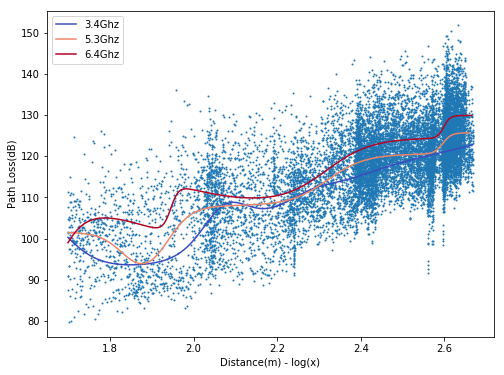

RMSE(dB),train error,test error
3.4Ghz,6.89188,6.97656
5.3Ghz,6.85470,6.94937
6.4Ghz,7.38049,7.57958


In [4]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


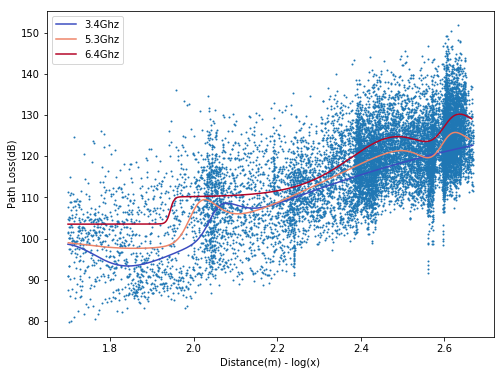

RMSE(dB),train error,test error
3.4Ghz,6.89137,6.96462
5.3Ghz,6.83990,6.93006
6.4Ghz,7.38312,7.53467


In [5]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_bh_34, y_train_bh_34, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_34)
dataY.append(y_train_bh_34)
dataPredX.append(model_34.predict(X_train_bh_34))
model_53 = mlp_regression(X_train_bh_53, y_train_bh_53, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_53)
dataY.append(y_train_bh_53)
dataPredX.append(model_53.predict(X_train_bh_53))
model_64 = mlp_regression(X_train_bh_64, y_train_bh_64, (60), 'tanh', 'lbfgs')
dataX.append(X_train_bh_64)
dataY.append(y_train_bh_64)
dataPredX.append(model_64.predict(X_train_bh_64))

print("<Bundang>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_bh, y_train_bh, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_bh_34, y_train_bh_34), mlp_prediction_error(model_34,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model_53,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model_53,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model_64,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model_64,X_test_bh_64, y_test_bh_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


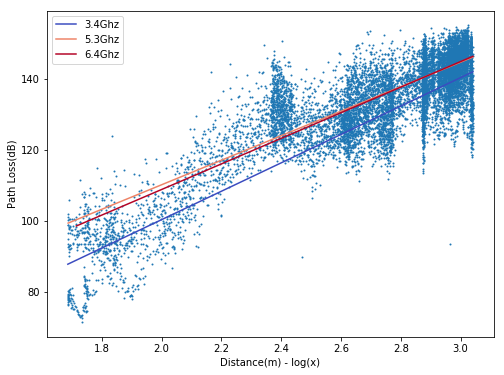

RMSE(dB),train error,test error
3.4Ghz,7.74425,7.54112
5.3Ghz,6.47094,6.91313
6.4Ghz,6.88171,7.13402


In [9]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'relu', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


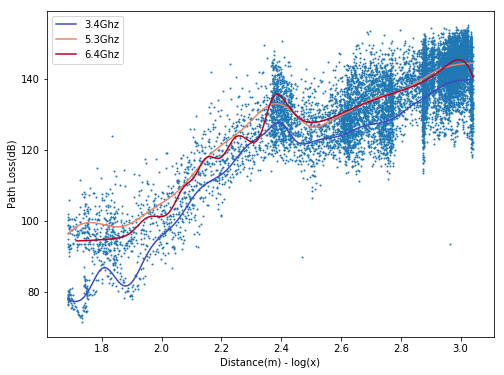

RMSE(dB),train error,test error
3.4Ghz,6.38105,6.40432
5.3Ghz,5.74218,6.07229
6.4Ghz,5.64487,5.42628


In [7]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'logistic', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


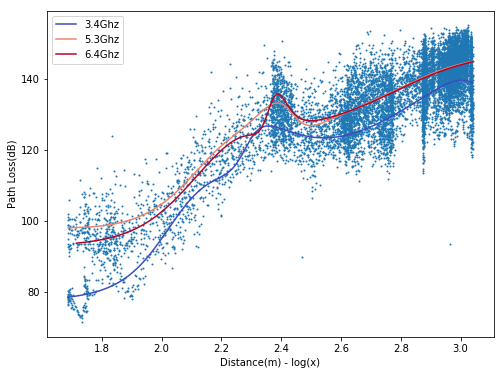

RMSE(dB),train error,test error
3.4Ghz,6.44193,6.37272
5.3Ghz,5.76999,6.08749
6.4Ghz,5.78709,5.54691


In [8]:
%autoreload
dataX = list()
dataY = list()
dataPredX = list()
model_34 = mlp_regression(X_train_ma_34, y_train_ma_34, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_34)
dataY.append(y_train_ma_34)
dataPredX.append(model_34.predict(X_train_ma_34))
model_53 = mlp_regression(X_train_ma_53, y_train_ma_53, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_53)
dataY.append(y_train_ma_53)
dataPredX.append(model_53.predict(X_train_ma_53))
model_64 = mlp_regression(X_train_ma_64, y_train_ma_64, (60), 'tanh', 'lbfgs')
dataX.append(X_train_ma_64)
dataY.append(y_train_ma_64)
dataPredX.append(model_64.predict(X_train_ma_64))

print("<Mokdong>")
mlp_train_multi_graph(dataX, dataY, dataPredX, X_train_ma, y_train_ma, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model_34,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model_34,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model_53,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model_53,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model_64,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model_64,X_test_ma_64, y_test_ma_64)])

(pd.DataFrame(stat.reshape((3,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

# Multi-dimensional regression (Features: log distance, frequency)

In [9]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',np.log10(3400))
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',np.log10(5300))
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',np.log10(6400))

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',np.log10(3400))
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',np.log10(5300))
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',np.log10(6400))

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])

dataX_bh = list()
dataX_ma = []
dataX_bh.append(X_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataX_bh.append(X_train_bh_64)

dataX_ma.append(X_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataX_ma.append(X_train_ma_64)

<Bundang>


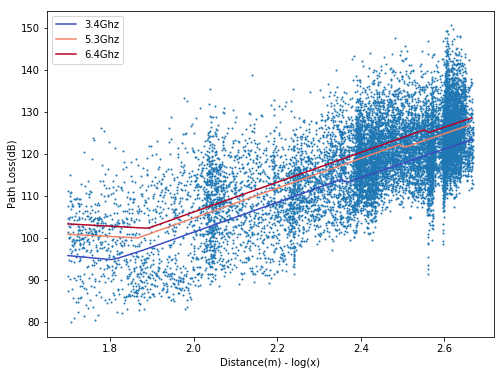

RMSE(dB),train error,test error
3.4Ghz,7.00811,7.28389
5.3Ghz,7.16169,7.13442
6.4Ghz,7.55731,7.51164
Overall,7.24351,7.30847


In [191]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'relu', 'lbfgs')

print("<Bundang>")
mlp_train_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


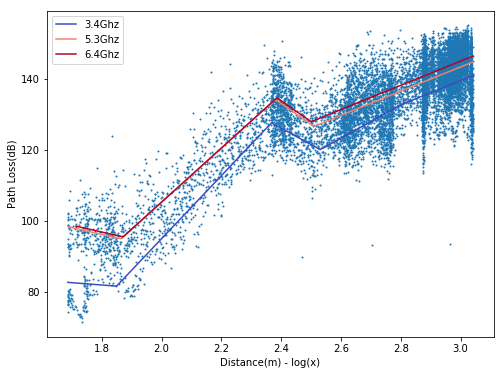

RMSE(dB),train error,test error
3.4Ghz,6.58094,6.71375
5.3Ghz,5.89843,5.71289
6.4Ghz,5.96119,5.57852
Overall,6.14289,6.00478


In [195]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60), 'relu', 'lbfgs')
print("<Mokdong>")
mlp_train_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma, 'relu', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


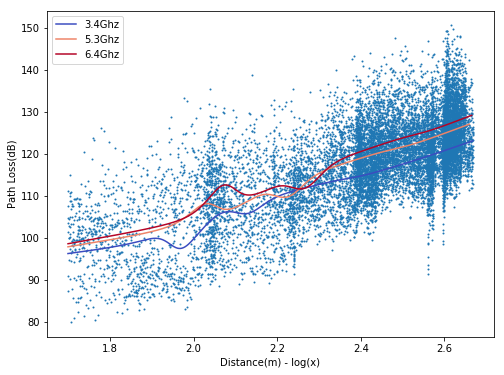

RMSE(dB),train error,test error
3.4Ghz,6.98505,7.26720
5.3Ghz,7.11654,7.00835
6.4Ghz,7.51857,7.44000
Overall,7.20764,7.23686


In [197]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60), 'logistic', 'lbfgs')

print("<Bundang>")
mlp_train_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


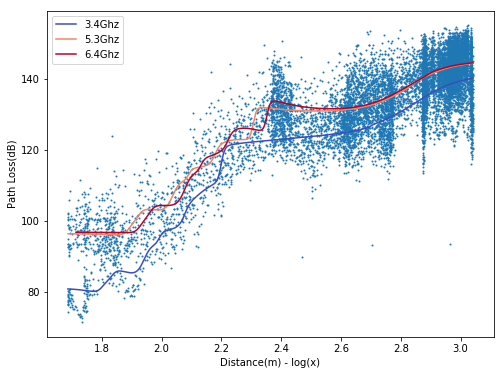

RMSE(dB),train error,test error
3.4Ghz,6.58785,6.79849
5.3Ghz,5.89594,5.71713
6.4Ghz,5.88753,5.59217
Overall,6.12049,6.04048


In [200]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60), 'logistic', 'lbfgs')
print("<Mokdong>")
mlp_train_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma, 'logistic', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Bundang>


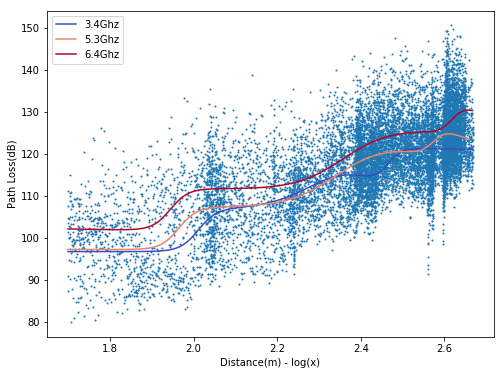

RMSE(dB),train error,test error
3.4Ghz,6.95308,7.28598
5.3Ghz,6.99388,6.90846
6.4Ghz,7.40057,7.39128
Overall,7.11582,7.19372


In [203]:
%autoreload
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60), 'tanh', 'lbfgs')

print("<Bundang>")
mlp_train_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_bh_34, y_train_bh_34),mlp_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 mlp_prediction_error(model,X_train_bh_53, y_train_bh_53),mlp_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 mlp_prediction_error(model,X_train_bh_64, y_train_bh_64),mlp_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 mlp_prediction_error(model,X_train_bh, y_train_bh), mlp_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

<Mokdong>


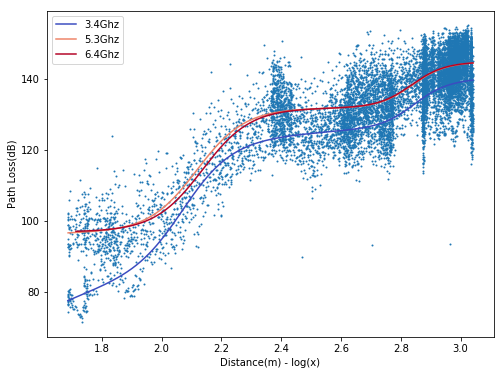

RMSE(dB),train error,test error
3.4Ghz,6.56357,6.74807
5.3Ghz,5.93081,5.72333
6.4Ghz,5.99406,5.76026
Overall,6.15858,6.07764


In [205]:
%autoreload
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60), 'tanh', 'lbfgs')
print("<Mokdong>")
mlp_train_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma, 'tanh', 'lbfgs')

stat = np.array([mlp_prediction_error(model,X_train_ma_34, y_train_ma_34),mlp_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 mlp_prediction_error(model,X_train_ma_53, y_train_ma_53),mlp_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 mlp_prediction_error(model,X_train_ma_64, y_train_ma_64),mlp_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 mlp_prediction_error(model,X_train_ma, y_train_ma), mlp_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

In [16]:
%autoreload
dataX_bh = list()
dataY_bh = list()
dataX_bh.append(X_train_bh_34)
dataY_bh.append(y_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataY_bh.append(y_train_bh_53)
dataX_bh.append(X_train_bh_64)
dataY_bh.append(y_train_bh_64)

dataX_ma = list()
dataY_ma = list()
dataX_ma.append(X_train_ma_34)
dataY_ma.append(y_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataY_ma.append(y_train_ma_53)
dataX_ma.append(X_train_ma_64)
dataY_ma.append(y_train_ma_64)

<Bundang>


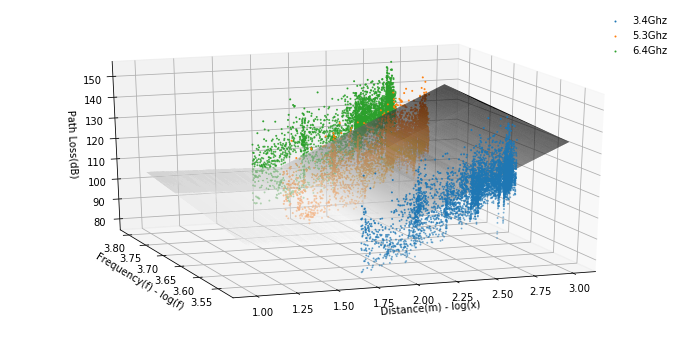

In [17]:
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'relu', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

<Bundang>


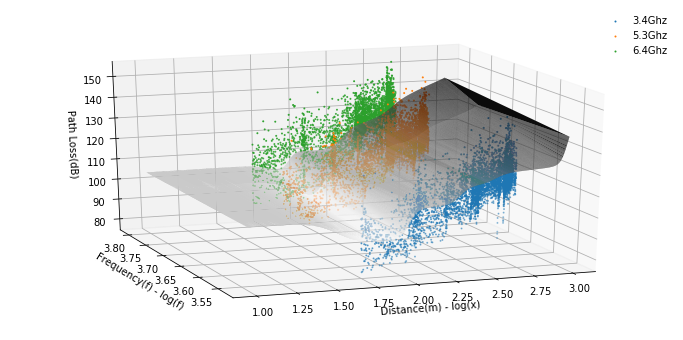

In [18]:
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'logistic', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

<Bundang>


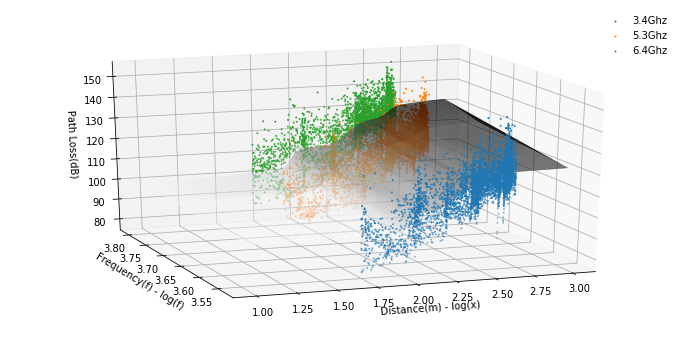

In [19]:
model = None
model = mlp_regression(X_train_bh, y_train_bh, (60,), 'tanh', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_bh, dataY_bh, X_train_bh)

<Bundang>


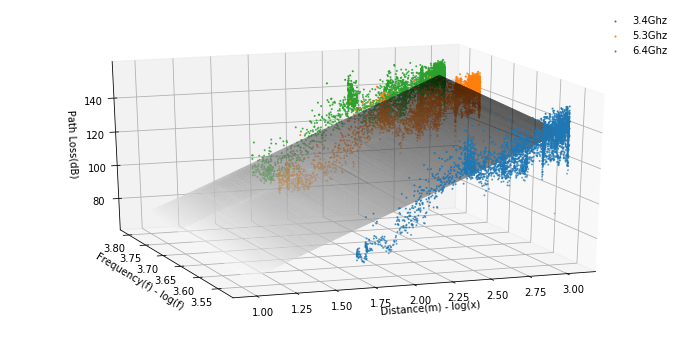

In [20]:
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'relu', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

<Bundang>


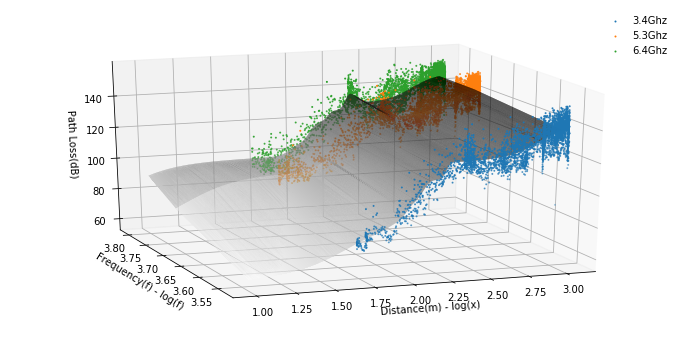

In [21]:
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'logistic', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)

<Bundang>


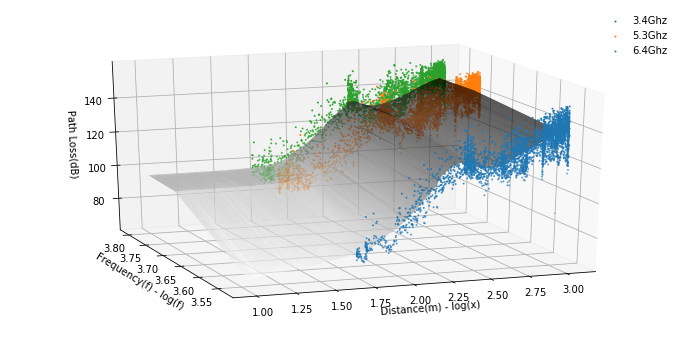

In [22]:
model = None
model = mlp_regression(X_train_ma, y_train_ma, (60,), 'tanh', 'lbfgs')

print("<Bundang>")
mlp_train_multi_3dgraph_comb(model, dataX_ma, dataY_ma, X_train_ma)